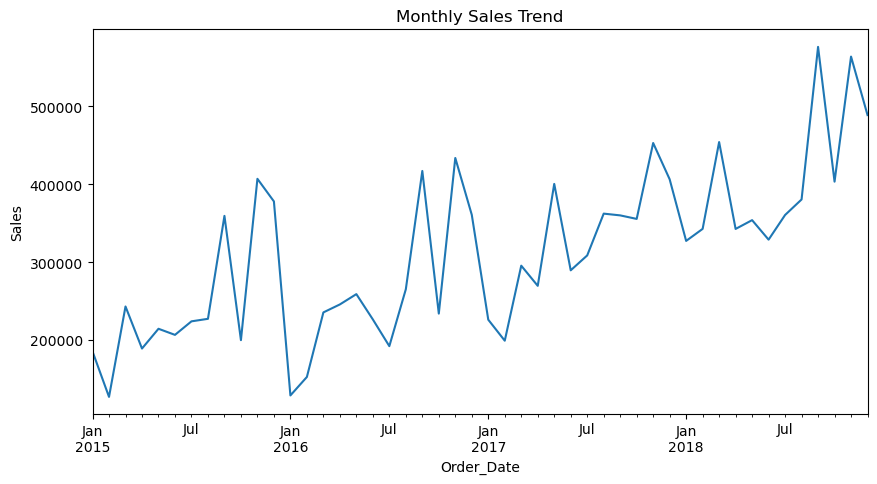

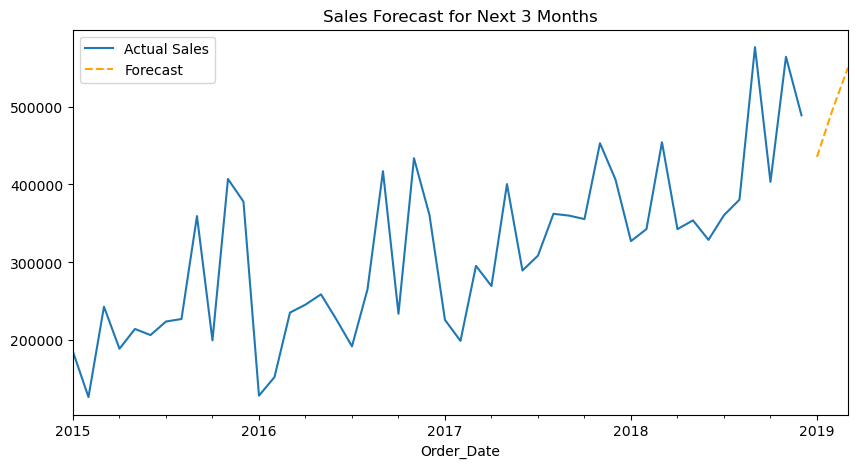

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df = pd.read_excel(r"C:\Users\Dell\supermarket-sales-analysis\excel\cleaned_supermarket_sales.xlsx")
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

monthly_sales = df.groupby(df['Order_Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()
monthly_sales = monthly_sales.sort_index()
monthly_sales.plot(title='Monthly Sales Trend', figsize=(10,5))
plt.ylabel("Sales")
plt.show()

model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=3)
fit_model = model.fit()
forecast = fit_model.forecast(3)
plt.figure(figsize=(10,5))
monthly_sales.plot(label='Actual Sales')
forecast.plot(label='Forecast', linestyle='--', color='orange')
plt.legend()
plt.title("Sales Forecast for Next 3 Months")
plt.show()

In [9]:
import warnings
warnings.filterwarnings("ignore")